In [15]:
# assume we are starting with geojson file already filtered to our area of interest
# this file should cover the entire desired time span

# import pandas as pd
import geopandas as gpd
import datetime as dt

def get_summary_statistics(file, interval):
    df = gpd.read_file(file)
    df['timestamp_dt'] = df["timestamp"].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))
    
    df_departures = df.loc[df["detect_type"] == "Departure"]
    departures_by_month = df_departures.groupby([
        df_departures["timestamp_dt"].apply(lambda x: x.year),
        df_departures["timestamp_dt"].apply(lambda x: x.month)])["detect_type"].count()

    ax = departures_by_month.plot(figsize=(15,8))
    ax.set_title("Graph of 'departure' type changes on a montly basis")
    ax.set_xlabel("Month of image collect")
    ax.set_ylabel("Number of departures")

    

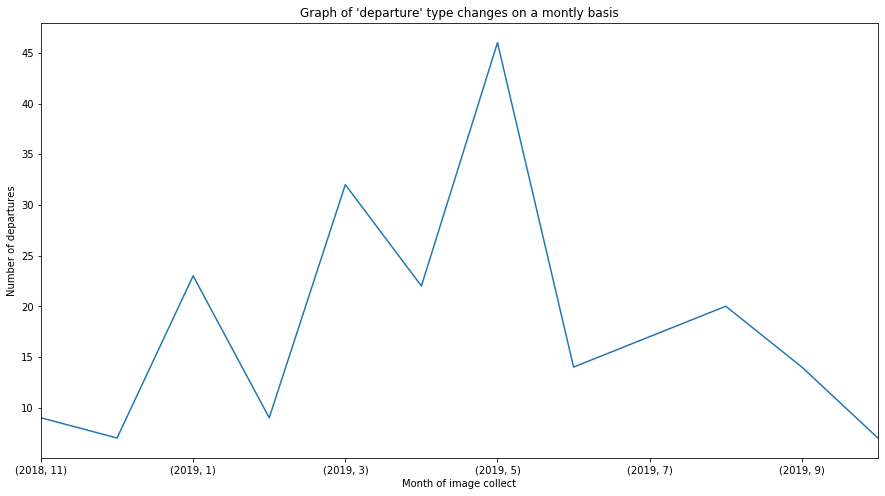

In [16]:
get_summary_statistics('/home/conor/Projects/D4D/connor_2020-02-10T13_39_00-07_00.geojson', 0)